Latest data can be found at: https://www.zillow.com/research/data/

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df_usa = pd.read_csv("Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")


In [47]:
df_usa


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2023-07-31,2023-09-30,2024-06-30
0,102001,0,United States,country,NaN,2023-06-30,0.6,1.6,6.3
1,394913,1,"New York, NY",msa,NY,2023-06-30,0.8,1.4,4.0
2,753899,2,"Los Angeles, CA",msa,CA,2023-06-30,1.2,3.6,5.3
3,394463,3,"Chicago, IL",msa,IL,2023-06-30,0.7,1.4,3.8
4,394514,4,"Dallas, TX",msa,TX,2023-06-30,0.4,1.2,5.1
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,2023-06-30,0.2,0.4,0.9
891,394743,936,"Ketchikan, AK",msa,AK,2023-06-30,-0.5,-0.9,0.9
892,753874,937,"Craig, CO",msa,CO,2023-06-30,1.0,2.5,8.7
893,395188,938,"Vernon, TX",msa,TX,2023-06-30,-1.2,-1.8,1.8


In [48]:
# Get the columns to calculate the sum
columns_to_sum = ["2023-09-30", "2024-06-30"]

# Calculate the sum for each row in the specified columns
df_usa["Sum"] = df_usa[columns_to_sum].sum(axis=1)

# Filter the DataFrame to include only rows where the sum is negative
df_price_top = df_usa.loc[df_usa["Sum"] >= 15]

df_price_top


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2023-07-31,2023-09-30,2024-06-30,Sum
488,395024,503,"Rio Grande City, TX",msa,TX,2023-06-30,1.9,5.4,10.3,15.7
671,394845,690,"McMinnville, TN",msa,TN,2023-06-30,1.5,4.0,12.7,16.7
681,395219,700,"West Plains, MO",msa,MO,2023-06-30,1.8,4.3,11.9,16.2
714,394894,734,"Murray, KY",msa,KY,2023-06-30,1.0,3.8,13.4,17.2
744,394713,768,"Jackson, WY",msa,WY,2023-06-30,1.3,2.9,13.1,16.0
810,395154,843,"Thomaston, GA",msa,GA,2023-06-30,1.3,3.6,14.1,17.7
822,394643,857,"Great Bend, KS",msa,KS,2023-06-30,1.8,4.5,12.6,17.1
842,394831,879,"Marshall, MO",msa,MO,2023-06-30,1.7,4.6,13.4,18.0
858,394837,895,"Maryville, MO",msa,MO,2023-06-30,1.5,3.6,12.9,16.5
872,394965,911,"Parsons, KS",msa,KS,2023-06-30,1.8,4.2,15.5,19.7


In [49]:
cities = df_price_top["RegionName"]
dates = df_price_top.columns[6:9]  # Assuming the dates start from the 7th column in the CSV and ignoring SUM 
data = df_price_top.iloc[:, 6:9]   # Extracting the numerical data for plotting

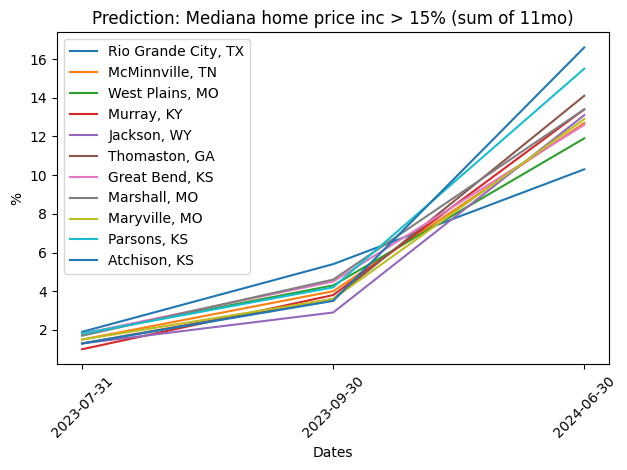

In [50]:

# Create a line plot for each city
for i, city in enumerate(cities):
    plt.plot(dates, data.iloc[i], label=city)


# Customize the plot
plt.xlabel("Dates")
plt.ylabel("%")
plt.title("Prediction: Mediana home price inc > 15% (sum of 11mo)")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
# Show the plot
plt.tight_layout()